# Sierraleone Solar Data Discovery

### Inspection and cleaning

In [2]:
import sys
import os


sys.path.append(os.path.abspath("../src"))
from data_loader import load_csv

file_path = "../data/sierraleone-bumbuna.csv"
df = load_csv(file_path)

df.head()

2025-05-17 11:21:31,642 - INFO - Successfully loaded data from ../data/sierraleone-bumbuna.csv with shape (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [4]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [5]:
# Remove comments column, change timestamp to datetime, and remove negative irradiance values
import pandas as pd

df.drop(columns=["Comments"], inplace=True)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

irradiance_cols = ['GHI', 'DNI', 'DHI']
day_time_df = df[~df[irradiance_cols].lt(0).any(axis=1)]
day_time_df = day_time_df[day_time_df['GHI'] > 0]

day_time_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238866 entries, 432 to 525227
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      238866 non-null  datetime64[ns]
 1   GHI            238866 non-null  float64       
 2   DNI            238866 non-null  float64       
 3   DHI            238866 non-null  float64       
 4   ModA           238866 non-null  float64       
 5   ModB           238866 non-null  float64       
 6   Tamb           238866 non-null  float64       
 7   RH             238866 non-null  float64       
 8   WS             238866 non-null  float64       
 9   WSgust         238866 non-null  float64       
 10  WSstdev        238866 non-null  float64       
 11  WD             238866 non-null  float64       
 12  WDstdev        238866 non-null  float64       
 13  BP             238866 non-null  int64         
 14  Cleaning       238866 non-null  int64         
 15  Pre

### Outlier detection and handling

In [6]:
from scipy.stats import zscore
import numpy as np

# Calculate z-scores for major columns
major_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

for column in major_cols:
    z_scores = zscore(day_time_df[column])
    day_time_df[f'outlier_{column}'] = (np.abs(z_scores) > 3)

outlier_summary = {col: day_time_df[f'outlier_{col}'].sum() for col in major_cols}
print("Outlier counts per column:", outlier_summary)

Outlier counts per column: {'GHI': np.int64(81), 'DNI': np.int64(0), 'DHI': np.int64(415), 'ModA': np.int64(33), 'ModB': np.int64(51), 'WS': np.int64(915), 'WSgust': np.int64(1140)}


#### Note

- No outliers for **DNI**
- Columns like **DHI**, **WS** and **Wsgust** show a significant number of outliers
- Relatively higher number of outliers from the benin data

2025-05-17 11:21:58,302 - INFO - PlotGenerator initialized successfully.
2025-05-17 11:21:59,735 - INFO - Histogram for GHI created successfully.
2025-05-17 11:22:01,020 - INFO - Histogram for ModA created successfully.
2025-05-17 11:22:02,181 - INFO - Histogram for ModB created successfully.


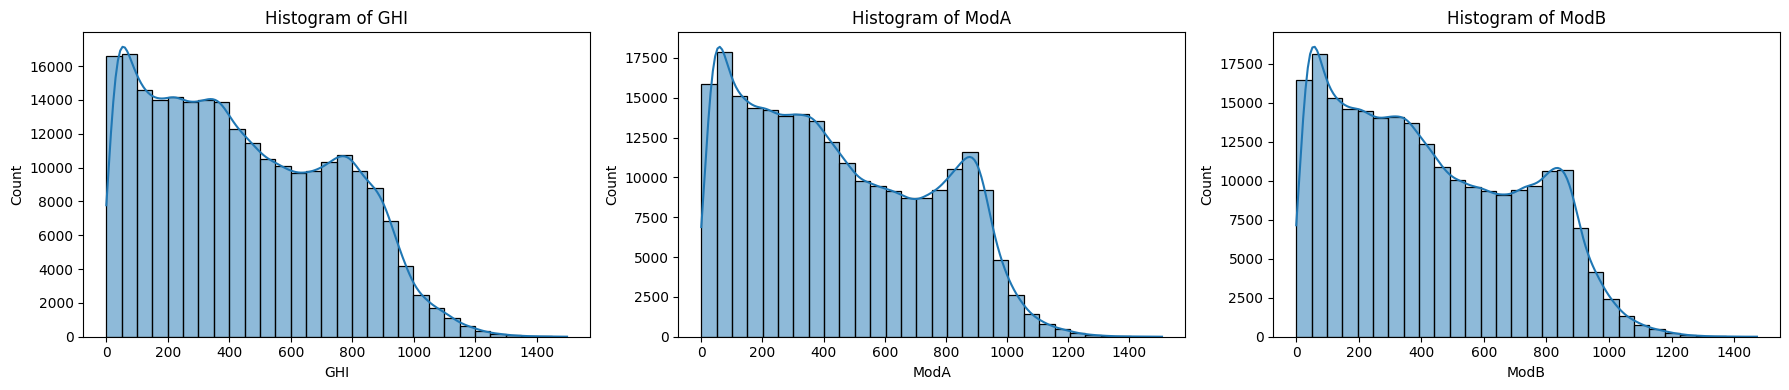

In [ ]:
# Histogram for columns with samll number of outliers
from plot_generator import PlotGenerator

plot_gen = PlotGenerator()
plot_gen.plot_histogram(df=day_time_df, columns=['GHI', 'ModA', 'ModB'])

#### Note

- The above histogram indicates the outliers identified by the z-score for these columns are not that extreme and may indicate rare conditions like a very sunny day and a cloudy day. I think keeping these small number of outliers will provide a more complete picture of the solar resource, including the potential for high energy generation during optimal conditions.

2025-05-17 11:36:43,504 - INFO - Histogram for DHI created successfully.
2025-05-17 11:36:44,740 - INFO - Histogram for WS created successfully.
2025-05-17 11:36:46,005 - INFO - Histogram for WSgust created successfully.


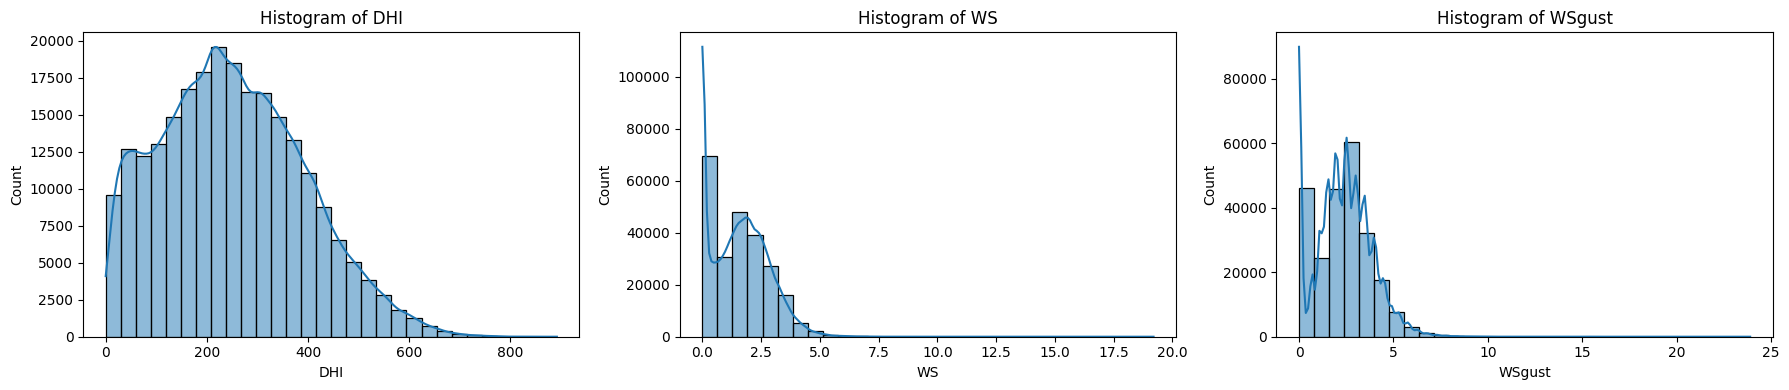

In [9]:
# Histogram for columns with large number of outliers
plot_gen.plot_histogram(df=day_time_df, columns=['DHI', 'WS', 'WSgust'])

#### Note

- The histograms show all three columns are right-skewed and most of the outliers lie in the extended long tail.

2025-05-17 11:43:47,632 - INFO - Boxplot for DHI created successfully.
2025-05-17 11:43:48,226 - INFO - Boxplot for WS created successfully.
2025-05-17 11:43:48,667 - INFO - Boxplot for WSgust created successfully.


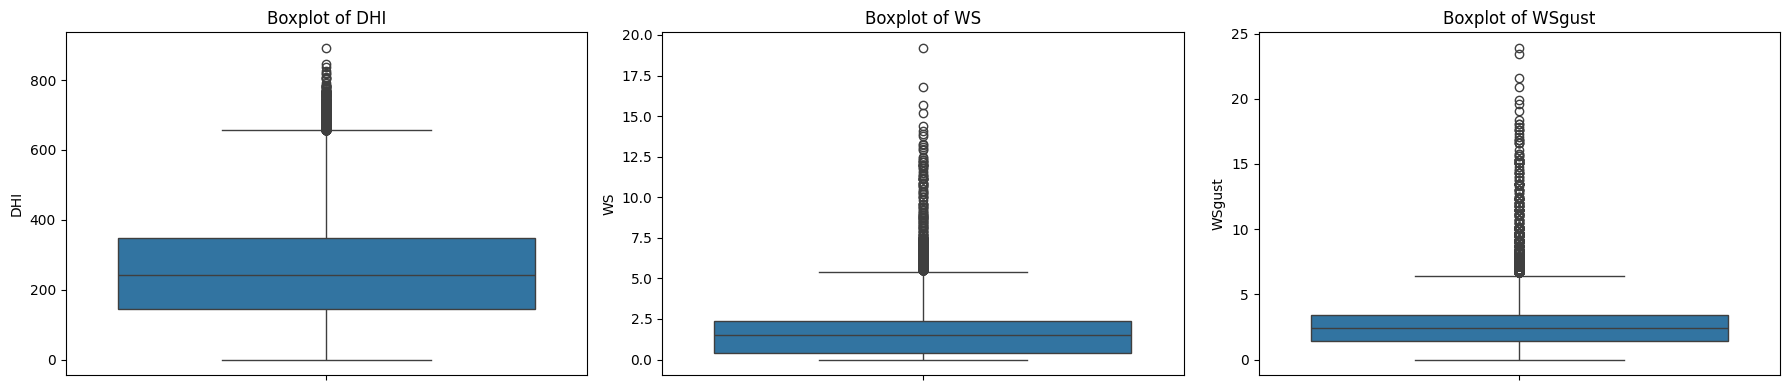

In [10]:
# Draw box-plots for columns with high number of outliers
plot_gen.plot_box(df=day_time_df, columns=['DHI', 'WS', 'WSgust'])

#### Note

- The box plot confirms the presence of a substantial number of high value outliers for the three columns. It visually emphasizes how far these values are from the main distribution, suggesting they are indeed unusual events.

2025-05-17 11:48:08,837 - INFO - Time Series for DHI created successfully.
2025-05-17 11:48:09,291 - INFO - Time Series for WS created successfully.
2025-05-17 11:48:09,689 - INFO - Time Series for WSgust created successfully.


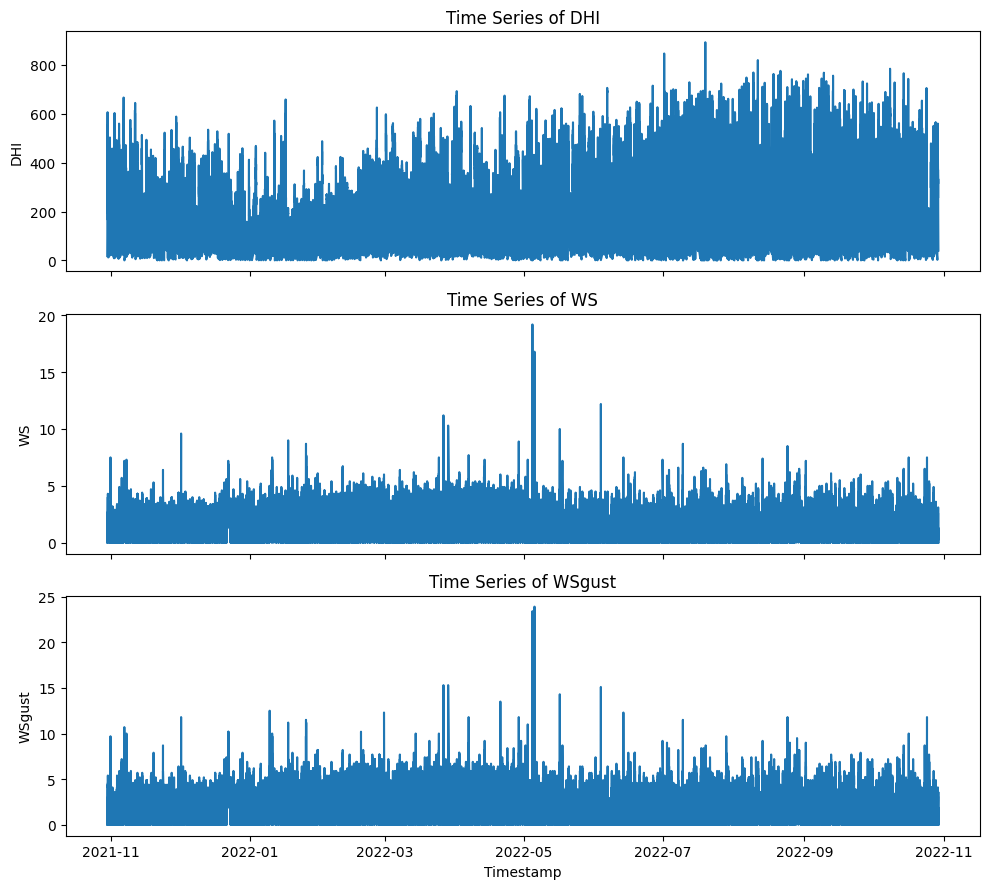

In [11]:
# plot time series for columns with high number of outliers
plot_gen.plot_time_series(df=day_time_df, columns=['DHI', 'WS', 'WSgust'], time_column='Timestamp')

#### Note

- The **DHI** plot shows a clear **diurnal (daily) pattern**, with values oscillating between **low (nighttime/cloudy) and higher (daytime/sunny)** levels. and hence the **high DHI values are likely not errors but represent the natural variability of direct solar irradiance**. *Keeping these values is crucial for understanding the potential direct solar resource.*

- The **WS** plot shows **more variability and less of a consistent daily pattern** compared to DHI. majority of the time winds are low,and the outliers seen in the box plot appear as **distinct, short-duration spikes of higher wind speed**. These wind speed outliers likely represent **specific weather events or periods of stronger winds**. *For structural considerations of solar panels, these high wind speeds are important to account for.*

- The **WSgust** plot shows even **more frequent and sharper spikes compared to the sustained WS**. The outliers here represent **the most extreme of these gusts**. Similar to WS outliers these are also *particularly important for the structural integrity and safety of any outdoor installations, including solar panels*.

In [12]:
# Calculate z-scores for other columns
other_cols = ['Tamb', 'BP', 'Precipitation', 'TModA', 'TModB']

for column in other_cols:
    z_scores = zscore(day_time_df[column])
    day_time_df[f'outlier_{column}'] = (np.abs(z_scores) > 3)

outlier_summary = {col: day_time_df[f'outlier_{col}'].sum() for col in other_cols}
print("Outlier counts per column:", outlier_summary)

Outlier counts per column: {'Tamb': np.int64(339), 'BP': np.int64(0), 'Precipitation': np.int64(1638), 'TModA': np.int64(0), 'TModB': np.int64(0)}


#### Note

- No outliers for **BP**, **TModA** and **TModB**.
- Significant number of outliers for **Tamb** and **Precipitation**.

2025-05-17 12:01:36,036 - INFO - Boxplot for Tamb created successfully.
2025-05-17 12:01:36,498 - INFO - Boxplot for Precipitation created successfully.


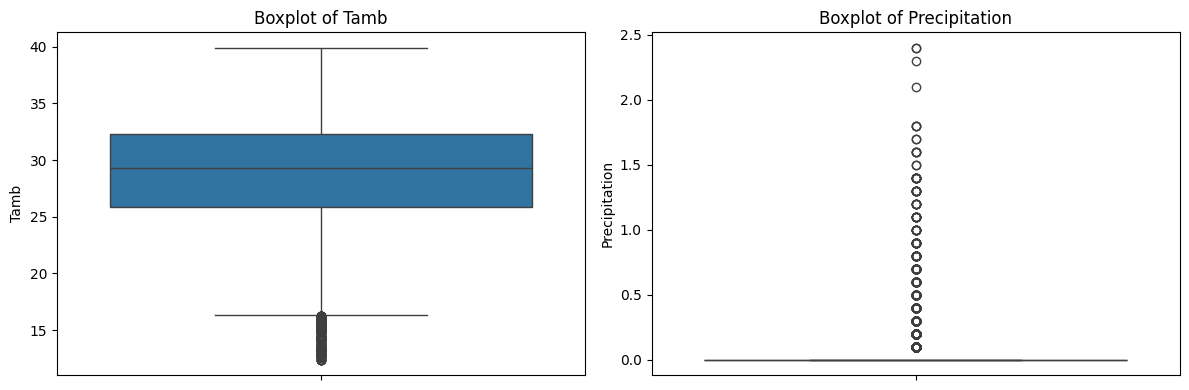

In [13]:
# Box plots for other columns with outliers
plot_gen.plot_box(df=day_time_df, columns=['Tamb','Precipitation'])

#### Note

- The box plot for **Tamb (Ambient Temperature)** shows a relatively symmetrical distribution of temperatures with most of the outliers at the lower ends, indicating the **occasional occurrence of unusually cold days** in **Sierra Leone**.

- The box plot for **Precipitation** reveals a **highly skewed distribution**, with most observations recording **very little to no precipitation**. The numerous outliers extending to **higher precipitation values indicate that while rainfall is generally infrequent or light**, there are a significant number of instances with varying amounts of rainfall, including some heavier precipitation events.

2025-05-17 12:10:13,063 - INFO - Histogram for Tamb created successfully.
2025-05-17 12:10:14,279 - INFO - Histogram for Precipitation created successfully.


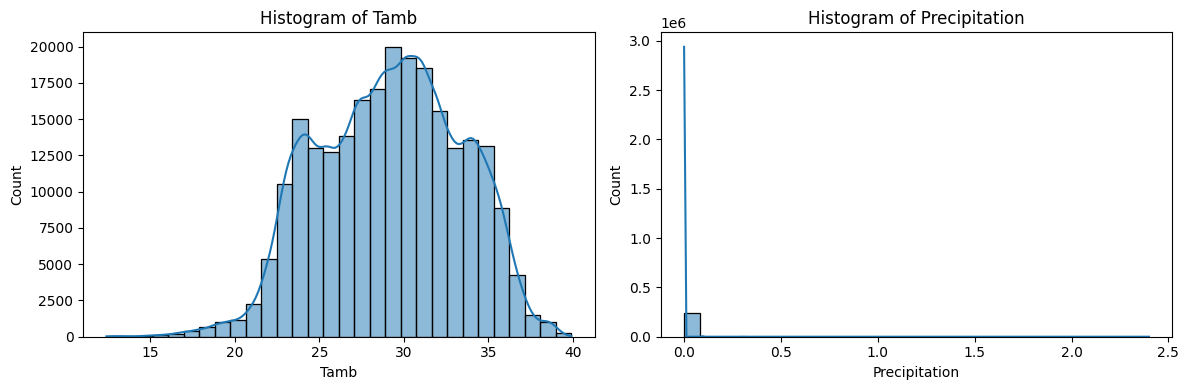

In [14]:
# Histograms for the above columsn for further analysis
plot_gen.plot_histogram(df=day_time_df, columns=['Tamb','Precipitation'])

#### Note

- The histogram of **Tamb (Ambient Temperature)** reveals a **bimodal distribution**, suggesting **two common temperature ranges**: **one centered around the mid-20s (°C)** and **another more prominent peak in the low 30s (°C)**. This bimodality might indicate distinct temperature patterns associated with different times of the year or day. The distribution extends from the low teens to around 40°C, with fewer observations at the extreme ends, consistent with the outliers seen in the box plot.

- The histogram of **Precipitation** is **extremely right-skewed**. There is a very tall bar at 0, indicating that the vast majority of observations recorded **no precipitation**. The frequency of observations decreases rapidly as precipitation amounts increase, with a very long tail extending to the right, representing the less frequent but varying amounts of rainfall. This confirms the pattern suggested by the box plot, highlighting that rainfall events are relatively sparse compared to dry periods.

2025-05-17 12:14:14,689 - INFO - Time Series for Tamb created successfully.
2025-05-17 12:14:15,136 - INFO - Time Series for Precipitation created successfully.


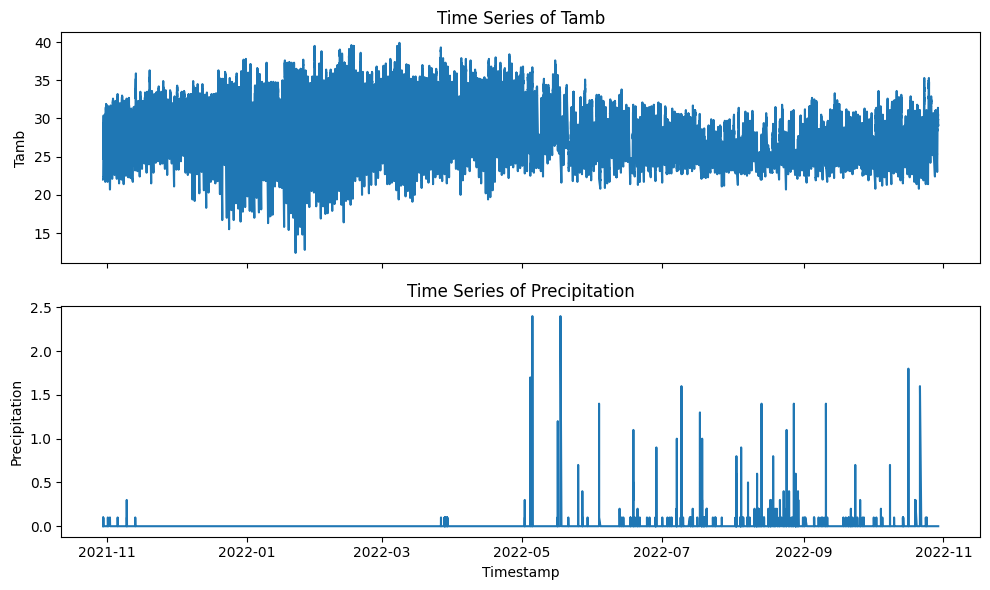

In [15]:
# plot TS plot for final decision
plot_gen.plot_time_series(df=day_time_df, columns=['Tamb','Precipitation'], time_column='Timestamp')

#### Note

- The extreme high and low temperatures appear to be part of the natural temperature fluctuations at the location, likely representing the extremes of daily and possibly seasonal variations. Therefore, **these outliers should be kept in the dataset.** *They provide valuable information about the range of temperatures the solar panels will be exposed to, which is important for performance and material considerations. Truncating them would lead to an underestimation of the actual temperature extremes.*

- The high precipitation values are clearly identifiable as distinct rainfall events in the time series. These are not errors and are essential for understanding the weather patterns at the potential solar panel site. Rainfall can affect panel cleanliness and potentially solar irradiance. Therefore, these outliers (high precipitation values) should also be kept in the dataset. Truncating them would remove information about the intensity and frequency of rainfall, which is a relevant factor for site assessment.

In [16]:
# Drop outlier columns and save clean data to csv
day_time_df.drop(columns=[f'outlier_{col}' for col in major_cols + other_cols], inplace=True)
day_time_df.to_csv("../data/sierraleone-bumbuna_clean.csv", index=False)